In [1]:
import geopandas as gpd
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bring in sweden shapefile
# data source: https://gadm.org/download_country_v3.html
gdf = gpd.read_file('data/gadm36_SWE_2.shp')

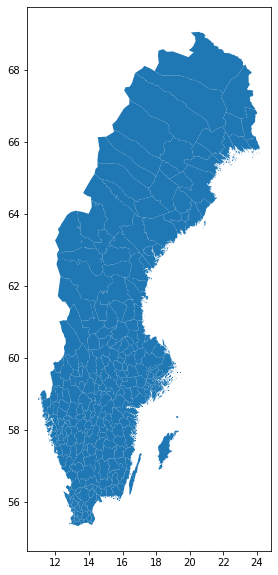

In [3]:
# plot it
gdf.plot(figsize=(10,10))

In [4]:
# get bounding bounds
minx,miny,maxx,maxy = gdf.total_bounds

In [5]:
# function to generate random points within a bounding box
def random_points_within(gdf, num_points):
    min_x, min_y, max_x, max_y = gdf.total_bounds
    
    df = pd.DataFrame(columns=('lon', 'lat'))

    for i in range(num_points):
        df.loc[i]=[random.uniform(min_x, max_x),random.uniform(min_y, max_y)]
    return df

In [6]:
# run the function to create 20 random points
df = random_points_within(gdf,200)

In [7]:
# convert it to a geodataframe for mapping
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat),crs='epsg:4326')

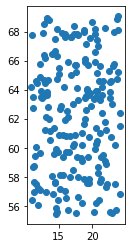

In [8]:
# plot the random points
gdf_points.plot()

(10.300838232040466, 24.83294606208801, 54.65011100769054, 69.74517555236828)

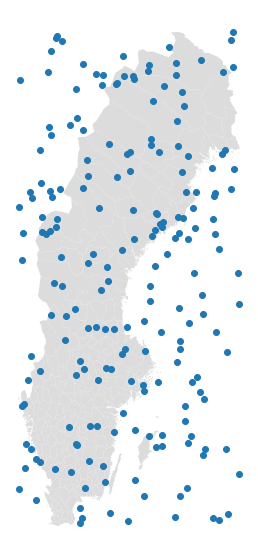

In [9]:
# map both layers
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,color='gainsboro')
gdf_points.plot(ax=ax)
ax.axis('off')

In [10]:
# do a spatial join to see which points fall within which polygons
dfsjoin = gpd.sjoin(gdf, gdf_points) #Spatial join Points to polygons

In [11]:
# get number of points per geometry
point_count = dfsjoin.GID_2.value_counts().reset_index().rename(columns={'index':'GID_2','GID_2':'point_count'})

In [12]:
point_count.head()

,GID_2,point_count
0,SWE.10.5_1,6
1,SWE.10.9_1,5
2,SWE.6.1_1,5
3,SWE.10.7_1,4
4,SWE.19.4_1,3


In [13]:
print(point_count.shape)
print(gdf.shape)

(58, 2)
(290, 14)


In [14]:
# merge it back to original shape
gdf = gdf.merge(point_count, on='GID_2', how='left')

In [18]:
gdf[['GID_2','point_count']].sample(10)

,GID_2,point_count
126,SWE.13.12_1,0.0
183,SWE.16.1_1,0.0
94,SWE.11.5_1,0.0
48,SWE.7.4_1,0.0
15,SWE.2.11_1,0.0
60,SWE.8.5_1,1.0
28,SWE.3.9_1,0.0
192,SWE.17.3_1,1.0
240,SWE.21.2_1,0.0
252,SWE.21.14_1,0.0


In [19]:
# fill NaN's with 0
gdf['point_count'].fillna(0, inplace=True)

(10.300838232040466, 24.83294606208801, 54.65011100769054, 69.74517555236828)

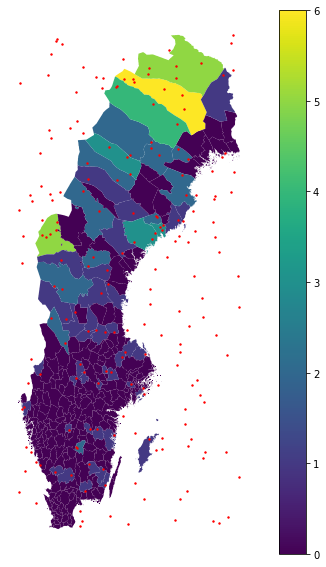

In [21]:
# map both layers
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,column='point_count',legend=True)
gdf_points.plot(ax=ax,markersize=2,color='red')
ax.axis('off')

In [22]:
# let's add a basemap
import contextily as ctx

In [25]:
# meed to project our layers to Web Mercator for basemaps to work
gdf_web_mercator = gdf.to_crs('epsg:3857')
gdf_points_web_mercator = gdf_points.to_crs('epsg:3857')

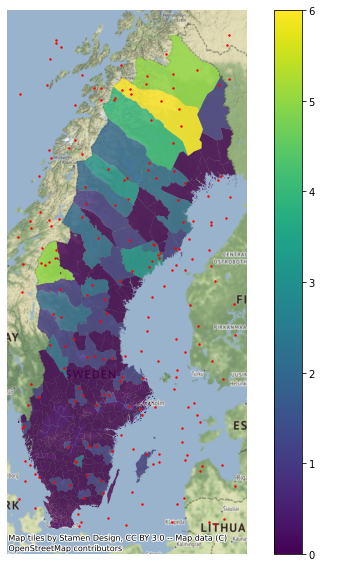

In [27]:
# map both layers
fig, ax = plt.subplots(figsize=(10,10))
gdf_web_mercator.plot(ax=ax,column='point_count',legend=True, alpha=0.8)
gdf_points_web_mercator.plot(ax=ax,markersize=2,color='red')
ax.axis('off')
ctx.add_basemap(ax)